# XGBoost solution

**_______________________________________________________________________________________________________________________________**

**Загрузим все необходимые зависимости и сущности, модули:**

In [205]:
%run ../preset.py

---------------------------------------------------------------------------------------------------------------------------

**Загрузим готовые данные:**

In [2]:
df = pd.read_parquet(feature_data_url)

___________________________________________________________________________________________________________________________

**Обзор dataframe-a:**

In [3]:
df.shape

(5588845, 91)

In [4]:
df.columns

Index(['actual_consumption', 'time_dummie', 'year', 'month', 'day_of_month',
       'hour', 'day_of_week', 'day_of_year', 'week_of_year', 'quarter',
       'holiday', 'lag_hour', 'lag_day', 'lag_week', 'lag_month', 'lag_year',
       'Алтайский край', 'Амурская область', 'Архангельская область',
       'Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область', 'Вологодская область',
       'Воронежская область', 'Еврейская автономная область',
       'Забайкальский край', 'Западный энергорайон Якутии',
       'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Карачаево-Черкесская Республика',
       'Кемеровская область - Кузбасс', 'Кировская область',
       'Костромская область', 'Краснодарский край', 'Красноярский край',
       'Курганская область', 'Курская область', 'Ленинградская область',
       'Липецкая область', 'Московская

In [5]:
df.head(3)

,actual_consumption,time_dummie,year,month,day_of_month,hour,day_of_week,day_of_year,week_of_year,quarter,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2012-02-20 00:00:00,1302.0,8783,2012,2,20,0,1,51,8,3,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 00:00:00,1091.0,8783,2012,2,20,0,1,51,8,3,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 00:00:00,946.0,8783,2012,2,20,0,1,51,8,3,...,0,0,0,0,0,0,0,0,0,0


**Рассмотрим информацию о dataframe-е:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5588845 entries, 2012-02-20 00:00:00 to 2024-07-17 00:00:00
Data columns (total 91 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   actual_consumption                 float64
 1   time_dummie                        int64  
 2   year                               int64  
 3   month                              int64  
 4   day_of_month                       int64  
 5   hour                               int64  
 6   day_of_week                        int64  
 7   day_of_year                        int64  
 8   week_of_year                       int64  
 9   quarter                            int64  
 10  holiday                            int64  
 11  lag_hour                           float64
 12  lag_day                            float64
 13  lag_week                           float64
 14  lag_month                          float64
 15  lag_year                           float6

___________________________________________________________________________________________________________________________

**Отберём целевой признак:**

In [7]:
y = df["actual_consumption"].copy()

**Рассмотрим целевой признак:**

In [8]:
y

index
2012-02-20 00:00:00    1302.0
2012-02-20 00:00:00    1091.0
2012-02-20 00:00:00     946.0
2012-02-20 00:00:00     615.0
2012-02-20 00:00:00    1679.0
                        ...  
2024-07-17 00:00:00    3854.0
2024-07-17 00:00:00     412.0
2024-07-17 00:00:00     486.0
2024-07-17 00:00:00     358.0
2024-07-17 00:00:00     766.0
Name: actual_consumption, Length: 5588845, dtype: float64

___________________________________________________________________________________________________________________________

**Отберём переменные-регрессоры:**

In [9]:
x = df.drop(columns=["actual_consumption"])

**Рассмотрим отобранные признаки:**

In [10]:
x.head(3)

,time_dummie,year,month,day_of_month,hour,day_of_week,day_of_year,week_of_year,quarter,holiday,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0


___________________________________________________________________________________________________________________________

**Разобъём данные на три выборки (тренировочную, тестовую, валидационную) без перемешивания:**

In [11]:
x_train, x_other, y_train, y_other = train_test_split(
                                                      x,  # Значения признаков
                                                      y,  # Значения целевой переменной
                                                      test_size=0.3,  # Размер тестовой выборки
                                                      shuffle=False  # Отключаем перемешивание данных
                                                     )

In [12]:
x_test, x_val, y_test, y_val = train_test_split(
                                                x_other,  # Значения признаков
                                                y_other,  # Значения целевой переменной
                                                test_size=0.25,  # Размер тестовой выборки
                                                shuffle=False  # Отключаем перемешивание данных
                                               )

**Рассмотрим полученные выборки:**

In [13]:
x_train.head(3)

,time_dummie,year,month,day_of_month,hour,day_of_week,day_of_year,week_of_year,quarter,holiday,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
x_test.head(3)

,time_dummie,year,month,day_of_month,hour,day_of_week,day_of_year,week_of_year,quarter,holiday,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2020-12-15 07:00:00,84518,2020,12,15,7,2,350,51,3,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-15 07:00:00,84518,2020,12,15,7,2,350,51,3,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-15 07:00:00,84518,2020,12,15,7,2,350,51,3,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
x_val.head(3)

,time_dummie,year,month,day_of_month,hour,day_of_week,day_of_year,week_of_year,quarter,holiday,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2023-08-24 07:00:00,107980,2023,8,24,7,4,236,34,3,0,...,0,0,0,0,0,0,0,0,0,0
2023-08-24 07:00:00,107978,2023,8,24,7,4,236,34,3,0,...,0,0,0,0,0,0,0,0,0,0
2023-08-24 07:00:00,107976,2023,8,24,7,4,236,34,3,0,...,0,0,0,0,0,0,0,0,0,0


___________________________________________________________________________________________________________________________

**Ознакомимся с моделью машинного обучения:**

In [16]:
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          d

___________________________________________________________________________________________________________________________

**Создадим модель машинного обучения:**

In [17]:
main_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.075)

___________________________________________________________________________________________________________________________

**Рассмотрим параметры сетки:**

In [18]:
# help(GridSearchCV)

**Установим параметры сетки:**

In [19]:
# parameters = {
# #               "max_depth":[2, 3],
# #               "max_leaves": [4, 5],
# #               "learning_rate":[0.05, 0.025],
#               "n_estimators": [1000]
#              }

**Создадим сетку:**

In [20]:
# GS_model = GridSearchCV(
#                         main_model,
#                         param_grid=parameters,
#                         cv=4,
#                         scoring="neg_mean_squared_error"
#                        )

**Найдём лучшие параметры при помощи сетки:**

In [21]:
x_train

,time_dummie,year,month,day_of_month,hour,day_of_week,day_of_year,week_of_year,quarter,holiday,...,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Центральный энергорайон Якутии,Челябинская область,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область
index,,,,,,,,,,,,,,,,,,,,,
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 00:00:00,8783,2012,2,20,0,1,51,8,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15 07:00:00,84518,2020,12,15,7,2,350,51,3,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-15 07:00:00,84522,2020,12,15,7,2,350,51,3,0,...,0,0,0,0,0,0,0,0,0,0
2020-12-15 07:00:00,84522,2020,12,15,7,2,350,51,3,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
x_train.columns

Index(['time_dummie', 'year', 'month', 'day_of_month', 'hour', 'day_of_week',
       'day_of_year', 'week_of_year', 'quarter', 'holiday', 'lag_hour',
       'lag_day', 'lag_week', 'lag_month', 'lag_year', 'Алтайский край',
       'Амурская область', 'Архангельская область', 'Астраханская область',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Волгоградская область', 'Вологодская область', 'Воронежская область',
       'Еврейская автономная область', 'Забайкальский край',
       'Западный энергорайон Якутии', 'Ивановская область',
       'Иркутская область', 'Кабардино-Балкарская Республика',
       'Калининградская область', 'Калужская область',
       'Карачаево-Черкесская Республика', 'Кемеровская область - Кузбасс',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Московская область',
       'Мурманская

In [22]:
main_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.075, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Рассмотрим лучшие параметры подобранные с помощью сетки:**

In [23]:
# print(GS_model.best_params_)

___________________________________________________________________________________________________________________________

**Спрогнозируем данные на валидационной выборке:**

In [24]:
y_pred = main_model.predict(x_test)

**Оценим полученный результат:**

In [25]:
y_test

index
2020-12-15 07:00:00      92.0
2020-12-15 07:00:00    1009.0
2020-12-15 07:00:00    1065.0
2020-12-15 07:00:00    1147.0
2020-12-15 07:00:00     440.0
                        ...  
2023-08-24 07:00:00    1068.0
2023-08-24 07:00:00    1210.0
2023-08-24 07:00:00    1670.0
2023-08-24 07:00:00     290.0
2023-08-24 07:00:00     488.0
Name: actual_consumption, Length: 1257490, dtype: float64

In [26]:
check_res(y_pred, y_test)

Значения метрик:
                              MSE - 9849.089498525245
                              MAE - 36.97553042123986
                              MAPE - 0.025373941713914494


In [27]:
res_x = pd.concat([x_train, x_test])

In [28]:
res_y = pd.concat([y_train, y_test])

In [29]:
main_model.fit(res_x, res_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.075, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
sm = res_y.rolling(window=75*365*24*4, center=True, step=500).mean()

<Axes: xlabel='index'>

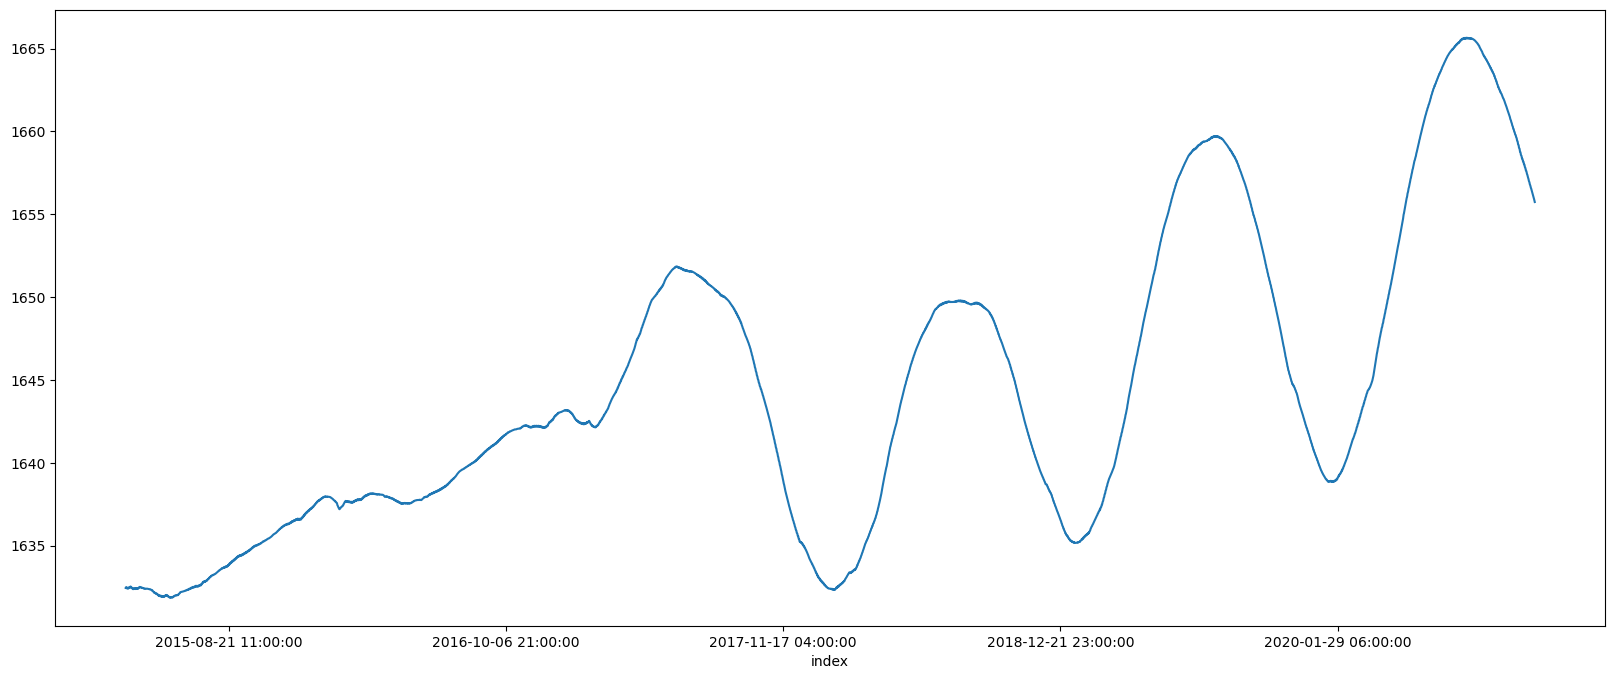

In [31]:
plt.figure(figsize=(20, 8))
sm.plot()

In [32]:
y_new_pred = main_model.predict(x_val)

In [33]:
check_res(y_new_pred, y_val)

Значения метрик:
                              MSE - 12628.334817250823
                              MAE - 39.61273694749386
                              MAPE - 0.024794367958597907


**Создание pipeline-а:**

In [35]:
test_df = pd.read_csv("../parsed_data/new_da.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../parsed_data/new.csv'

In [ ]:
test_df.head()

In [ ]:
test_df = pd.read_csv(f"../../parsed_data/new.csv")

In [ ]:
res = prepare_df("new", "csv")

In [ ]:
test_df = pd.read_csv(f"../../parsed_data/new.csv")

In [ ]:
test_df

In [ ]:
res

In [ ]:
y = res["actual_consumption"]

In [ ]:
x = res.drop(columns=["actual_consumption"])

In [ ]:
# x.drop(columns=["datetime", "subject_name"], inplace=True)

In [ ]:
x = x[res_x.columns]

In [ ]:
y_last = main_model.predict(x)

In [ ]:
x

In [ ]:
check_res(y_last, y)

In [ ]:
x=range(len(y))

In [ ]:
y

In [ ]:
y_last

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x[:150], y[:150], color="blue")  # постройте первый график
plt.plot(x[:150], y_last[:150], color="red")  # постройте второй график
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x[150:300], y[150:300], color="blue")  # постройте первый график
plt.plot(x[150:300], y_last[150:300], color="red")  # постройте второй график
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x[300:450], y[300:450], color="blue")  # постройте первый график
plt.plot(x[300:450], y_last[300:450], color="red")  # постройте второй график
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x[450:600], y[450:600], color="blue")  # постройте первый график
plt.plot(x[450:600], y_last[450:600], color="red")  # постройте второй график
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x[600:750], y[600:750], color="blue")  # постройте первый график
plt.plot(x[600:750], y_last[600:750], color="red")  # постройте второй график
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x[625:630], y[625:630], color="blue")  # постройте первый график
plt.plot(x[625:630], y_last[625:630], color="red")  # постройте второй график
plt.show()

In [ ]:
y.head(3)

In [ ]:
y[5585245+628] - y_last[628]

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x[1500:1600], y[1500:1600], color="blue")  # постройте первый график
plt.plot(x[1500:1600], y_last[1500:1600], color="red")  # постройте второй график

plt.show()

In [ ]:
from scipy import signal

res_y

In [ ]:
f, Pxx_den = signal.periodogram(res_y, 1)

In [ ]:
true_ind = res_x[(res_x["year"] == 2016) & (res_x["Алтайский край"] == 1)].index

In [ ]:
res_x[(res_x["year"] == 2016) & (res_x["Алтайский край"] == 1)]

In [ ]:
res_y[true_ind][150:300].plot()

In [ ]:
save_model("XGBmodel", main_model)

In [ ]:
zxc = open_model("XGBmodel")

In [ ]:
plot_periodogram(res_y[true_ind]);

In [ ]:
df = pd.read_parquet("../../prepare_data/feature_data.gzip")

In [ ]:
df.tail()

In [36]:
df = pd.read_parquet("../../prepare_data/feature_data.gzip")

In [41]:
df.iloc[-1]

actual_consumption                   766.0
time_dummie                       115804.0
year                                2024.0
month                                  7.0
day_of_month                          17.0
                                    ...   
Челябинская область                    0.0
Чеченская Республика                   0.0
Чувашская Республика - Чувашия         0.0
Южно-Якутский энергорайон              0.0
Ярославская область                    1.0
Name: 2024-07-17 00:00:00, Length: 91, dtype: float64

Прогноз относительно последнего обновления

In [131]:
"daY".lower()

'day'

In [233]:
res = make_subj_pred(1, 'w', "../../prepare_data/feature_data.gzip", "XGBmodel", "Челябинская область")

In [234]:
res

,time_dummie,year,month,day_of_month,hour,day_of_week,day_of_year,week_of_year,quarter,holiday,...,Чеченская Республика,Чувашская Республика - Чувашия,Южно-Якутский энергорайон,Ярославская область,lag_hour,lag_day,lag_week,lag_month,lag_year,actual_consumption
5576391,115589.0,2024.0,7.0,8.0,1.0,1.0,190.0,28.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3802.0,3729.0,3749.0,4023.0,4818.0,NaN
5576466,115590.0,2024.0,7.0,8.0,2.0,1.0,190.0,28.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3796.0,3712.0,3630.0,3941.0,4662.0,NaN
5576541,115591.0,2024.0,7.0,8.0,3.0,1.0,190.0,28.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3721.0,3796.0,3794.0,4006.0,4686.0,NaN
5576616,115592.0,2024.0,7.0,8.0,4.0,1.0,190.0,28.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3742.0,3916.0,3992.0,4131.0,4732.0,NaN
5576691,115593.0,2024.0,7.0,8.0,5.0,1.0,190.0,28.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3980.0,3982.0,4054.0,4397.0,4871.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588615,115800.0,2024.0,7.0,16.0,21.0,2.0,198.0,29.0,3.0,0.0,...,0.0,0.0,0.0,0.0,4129.0,3931.0,4120.0,3816.0,4899.0,NaN
5588690,115801.0,2024.0,7.0,16.0,22.0,2.0,198.0,29.0,3.0,0.0,...,0.0,0.0,0.0,0.0,4014.0,3900.0,4153.0,3906.0,4837.0,NaN
5588765,115802.0,2024.0,7.0,16.0,23.0,2.0,198.0,29.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3912.0,3842.0,4005.0,3747.0,5041.0,NaN
5600605,1.0,2024.0,7.0,17.0,0.0,3.0,199.0,29.0,3.0,0.0,...,0.0,0.0,0.0,0.0,3854.0,3774.0,3802.0,3723.0,4988.0,NaN
